In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error,r2_score


In [59]:
# Set random seed for reporducibility
np.random.seed(234)

In [60]:
# Generate random data for hours studied and test scores

n_samples = 500
X1 = abs(np.random.normal(1,10,n_samples))
noise = abs(np.random.normal(0,2,n_samples))
y = 10 * X1 + noise

In [61]:
#  create a Dataframne for easy manipulation

data = pd.DataFrame({"Hour_Studied":X1,"Test_score":y})
data.head()

,Hour_Studied,Test_score
0,9.187916,92.098735
1,9.435506,99.737324
2,4.509007,46.520385
3,10.215783,105.337700
4,0.126181,2.755831


              Hour_Studied  Test_score
Hour_Studied      1.000000    0.999807
Test_score        0.999807    1.000000


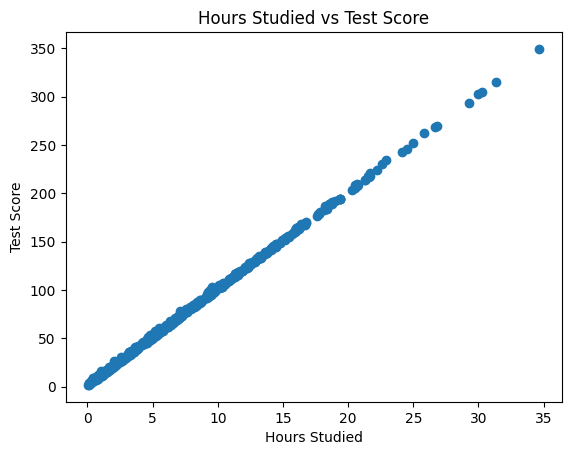

In [62]:
# Lets create a scatter plot

plt.scatter(data["Hour_Studied"],data["Test_score"])
plt.title("Hours Studied vs Test Score")
plt.xlabel("Hours Studied")
plt.ylabel("Test Score")
plt.show

# Lets check the correlation

cor_matrix = data.corr()
print(cor_matrix)

In [63]:
# lets split 
X = data[["Hour_Studied"]]
y = data['Test_score']


X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 234)

In [64]:
# lets scale to mean of 0 and s.d of 1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [65]:
# Lets instantiate our model and train on the scaled data

model = LinearRegression()
model.fit(X_train_scaled,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [66]:
print("Coefficent:",model.coef_)
print("intercept:",model.intercept_)

Coefficent: [60.38849142]
intercept: 81.80253630750676


In [67]:
# lets predict on the scaled data

new_data = np.array([[6]])

new_data_df = pd.DataFrame(new_data,columns = ["Hour_Studied"])

# Scale the new data to ensure consistency

new_data_scaled = scaler.transform(new_data_df)


# LEts now predict on a single test score

single_prediction = model.predict(new_data_scaled)
print(f"Predicted Test Score for 6 hrs of study: {single_prediction[0]}")


Predicted Test Score for 6 hrs of study: 61.561153732769526


In [68]:
# Lets evaluate our model

y_pred= model.predict(X_test_scaled )

#Calculate Mean Squared Error (MSE) and R-squared (R2)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score (y_test, y_pred) 
print(f"R-squared: {r2}")

Mean Squared Error: 1.1495150840549397
R-squared: 0.9997602335287038


In [69]:
# Lets save our model
joblib.dump(model,"linear_regression_model.pkl")
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [70]:
# lets load our model
loaded_model = joblib.load("linear_regression_model.pkl")
loaded_scaler = joblib.load("scaler.pkl")

In [73]:
# Let s use our loaded data for prediction

# New data for prediction (e.g., 6 hours of study)
new_data =  np.array([[6]])
new_data_df = pd.DataFrame(new_data, columns=['Hour_Studied'])
new_data_df.head()

,Hour_Studied
0,6


In [74]:
# scale the new data using the Loaded scaler
new_data_scaled = loaded_scaler.transform(new_data_df)

In [76]:
# Make the prediction using the Loaded model
single_prediction = loaded_model.predict(new_data_scaled)

#Output the predicted test score
print(f"Predicted Test Score for 6 hours of study: {single_prediction[0]}")

Predicted Test Score for 6 hours of study: 61.561153732769526
